In [1]:
# https://qiita.com/5sigma_AAA/items/0c23907da9330681147b

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [20]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

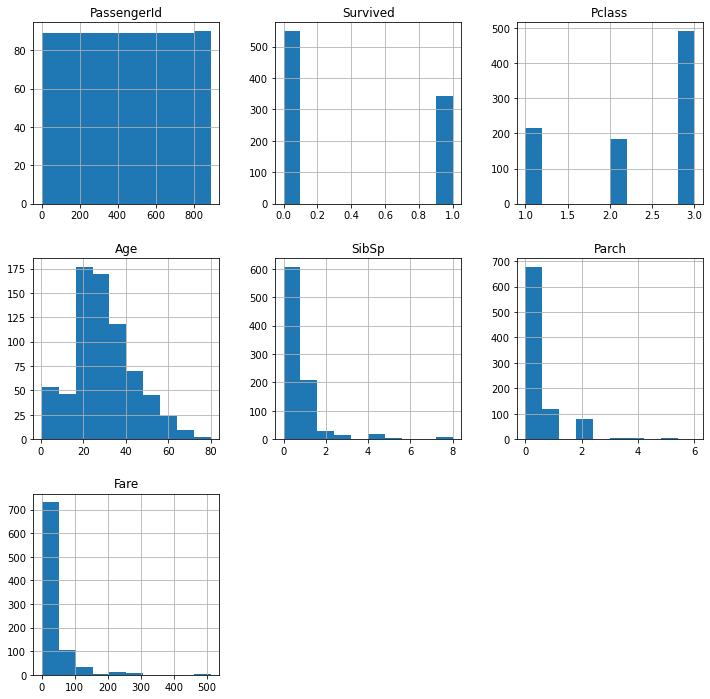

In [22]:
df.hist(figsize=(12,12))

<AxesSubplot:>

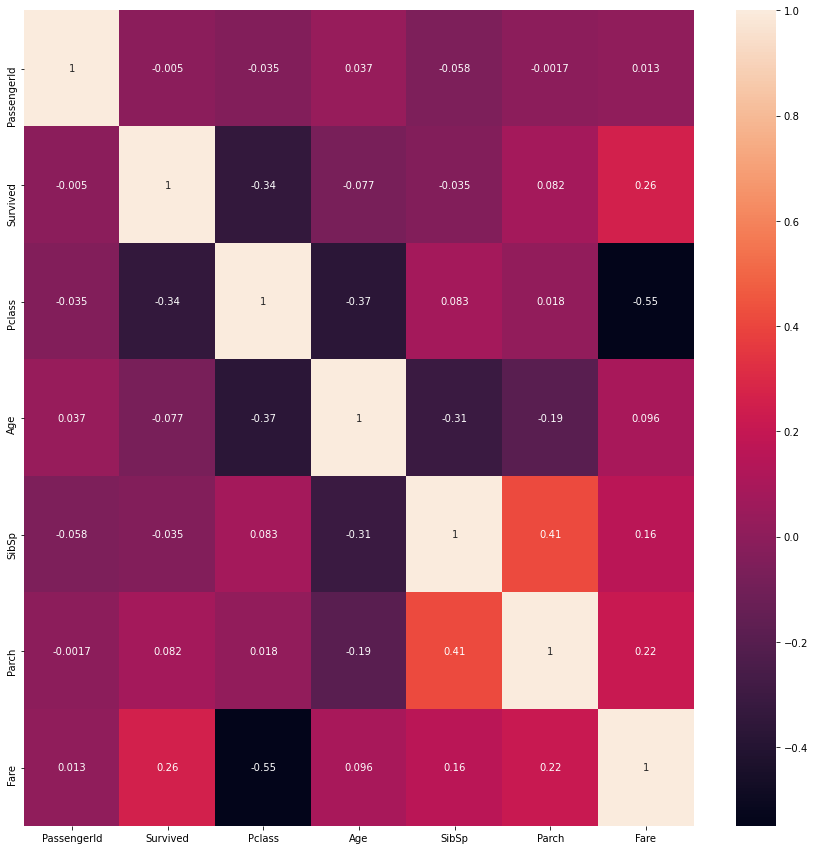

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)

/home/mito/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

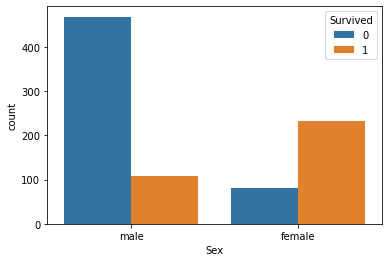

In [24]:
sns.countplot("Sex", hue = "Survived", data = df)

In [25]:
# 欠損値の確認
df.isnull().sum() # Age, cabinに欠損が多い

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
# 欠損値処理
df["Fare"] = df["Fare"].fillna(df["Fare"].median()) # 中央値で補完
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna("S")

# カテゴリ変数の変換
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "male" else 0)
df["Embarked"] = df["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)

# 不要な列の削除->不要な列とは？どういう基準できめてるの？
df = df.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1)

#学習データとテストデータに分割
train_X = df.drop("Survived", axis=1)
train_y = df.Survived
(train_X, test_X, train_y, test_y) = train_test_split(train_X, train_y,
                                                      test_size = 0.3, random_state=0)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score)
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)
fpr, tpr, threshold = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.8283582089552238

In [53]:
fi = pd.DataFrame([train_X.columns, np.array(clf.feature_importances_)])
fi

,0,1,2,3,4,5,6
0,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,0.162673,0.427117,0.150512,0.066427,0.030262,0.145111,0.017897


In [17]:
test_X

495    0
648    0
278    0
31     1
255    1
      ..
263    0
718    0
620    0
786    1
64     0
Name: Survived, Length: 268, dtype: int64

In [35]:
fin = pd.read_csv("test.csv")
fin.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [36]:
passengerid = fin["PassengerId"]
fin.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
fin["Fare"] = fin["Fare"].fillna(fin["Fare"].median()) # 学習データと同じく中央値で欠損をうめる
fin["Age"] = fin["Age"].fillna(fin["Age"].median())
fin["Embarked"] = fin["Embarked"].fillna("S")

fin["Sex"] = fin["Sex"].apply(lambda x: 1 if x=="male" else 0)
fin["Embarked"] = fin["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)
fin = fin.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)

predictions = clf.predict(fin)

submisson = pd.DataFrame({"PassengerId":passengerid, "Survived":predictions})
submisson.to_csv("submission.csv", index = False)